Estimated coefficient for linear model is
 theta = [ 2.00000579e+03  1.00000199e+00 -1.00000222e+02]


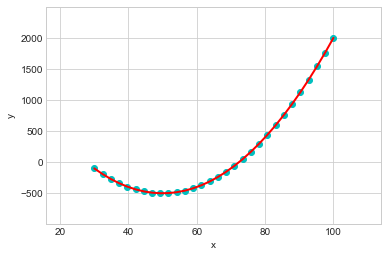

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def load(file_path):
    data_x = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=0)
    data_y = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=1)
    return data_x, data_y


def insert_col(x):
    """Add second order column and intercept"""
    square = np.square(x)
    intercept = np.ones(x.shape[0])
    new_x = np.column_stack((intercept, square, x))  # always use column stack for these cases
    return new_x


class Parabol:
    def __init__(self, x, y):
        self.theta = None
        self.x = x
        self.y = y

    def fit(self):
        x_new = insert_column(self.x)
        p = np.linalg.inv(x_new.T.dot(x_new))
        self.theta = p.dot(x_new.T).dot(self.y)
        return self.theta

    def predict(self, inp):
        inp = insert_column(inp)
        return inp.dot(self.theta)

    def plot(self, save_path):
        # Plot the dataset
        plt.figure()
        plt.style.use('seaborn-whitegrid')
        plt.plot(self.x, self.y, 'co', linewidth=2)

        # Plot the prediction line
        margin1 = (np.max(self.x) - np.min(self.x)) * 0.2
        margin2 = (np.max(self.y) - np.min(self.y)) * 0.2
        y_pred = self.predict(self.x)
        plt.plot(self.x, y_pred, color='red', linewidth=2)

        plt.xlim(np.min(self.x) - margin1, np.max(self.x) + margin1)
        plt.ylim(np.min(self.y) - margin2, np.max(self.y) + margin2)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig(save_path)
        plt.show()


def main():
    x, y = load(file_path="C:Downloads\data_square.csv")
    model = Parabol(x, y)
    theta = model.fit()
    print(f'Estimated coefficient for linear model is\n theta = {theta}')
    model.plot(save_path='C:Downloads\Problem 1.png')


if __name__ == "__main__":
    main()